In [2]:
import os

In [3]:
from opentargets_pharmgkb.pandas_utils import read_tsv_to_df

import pandas as pd

In [4]:
data_dir = '/home/april/projects/opentargets/pharmgkb/vep-vs-pgkb'

In [ ]:
# Download new data (2024-03-05)
!cd {data_dir}

!wget -q https://api.pharmgkb.org/v1/download/file/data/clinicalAnnotations.zip
!wget -q https://api.pharmgkb.org/v1/download/file/data/variants.zip

!unzip -jq clinicalAnnotations.zip "*.tsv" -d {data_dir}
!unzip -jq variants.zip "*.tsv" -d {data_dir}

!rm clinicalAnnotations.zip variants.zip

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [6]:
clinical_annot_path = os.path.join(data_dir, 'clinical_annotations.tsv')
clinical_alleles_path = os.path.join(data_dir, 'clinical_ann_alleles.tsv')
variants_path = os.path.join(data_dir, 'variants.tsv')
fasta_path = '/home/april/projects/opentargets/pharmgkb/assembly/GCF_000001405.40_GRCh38.p14_genomic.fna'

clinical_annot_table = read_tsv_to_df(clinical_annot_path)
clinical_alleles_table = read_tsv_to_df(clinical_alleles_path)
variants_table = read_tsv_to_df(variants_path)

In [7]:
# Table we're not yet using but should!
variant_annot_table = read_tsv_to_df('/home/april/projects/opentargets/pharmgkb/variantAnnotations/var_fa_ann.tsv')

In [22]:
variant_annot_table.head()

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,Specialty Population,Assay type,Metabolizer types,isPlural,Is/Is Not associated,Direction of effect,Functional terms,Gene/gene product,When treated with/exposed to/when assayed with,Multiple drugs And/or,Cell type,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
0,1451148445,"CYP2C19*1, CYP2C19*17",CYP2C19,normeperidine,30902024,NaN,not stated,"In other in vitro experiments, normeperidine formation was significantly correlated with CYP2C19 activity, as measured by S-mephenytoin 4-hydroxylation.",CYP2C19 *17/*17 is associated with increased formation of normeperidine as compared to CYP2C19 *1/*1 + *1/*17.,*17/*17,NaN,in human liver microsomes,NaN,Is,Associated with,increased,formation of,NaN,NaN,NaN,NaN,*1/*1 + *1/*17,NaN
1,1447814273,rs9923231,VKORC1,NaN,26847243,Other,no,NaN,Allele T is not associated with transcription of VKORC1 in HepG2 cells as compared to allele C.,T,NaN,luciferase assay,NaN,Is,Not associated with,NaN,transcription of,VKORC1,NaN,NaN,in HepG2 cells,C,NaN
2,1447814277,rs56314408,VKORC1,NaN,26847243,Other,yes,"In the European population, this SNPs is in high LD with rs9923231 but not other populations. This SNP disrupts a binding motif for transcription factor TFAP2A/C.",Allele C is associated with increased transcription of VKORC1 in HepG2 cells as compared to allele T.,C,NaN,luciferase assay,NaN,Is,Associated with,increased,transcription of,VKORC1,NaN,NaN,in HepG2 cells,T,NaN
3,1447990384,rs1065852,CYP2D6,bufuralol,2211621,Metabolism/PK,not stated,In vitro experiments showed a significant decrease in CYP2D6 activity for the variant construct expressed in COS-1 cells as compared to wild-type.,Allele A is associated with decreased activity of CYP2D6 when assayed with bufuralol in COS-1 cells as compared to allele G.,A,NaN,NaN,NaN,Is,Associated with,decreased,activity of,CYP2D6,when assayed with,NaN,in COS-1 cells,G,NaN
4,1448281185,"CYP2B6*1, CYP2B6*6",CYP2B6,bupropion,27439448,Efficacy,yes,The ratio of hydroxybupropion versus bupropion (AUC_hyd/ AUC_bup) in terms of area under the time-concentration curve (AUC) was used to assay CYP2B6 activity.,CYP2B6 *1/*1 is associated with increased activity of CYP2B6 when assayed with bupropion as compared to CYP2B6 *1/*6.,*1/*1,NaN,NaN,NaN,Is,Associated with,increased,activity of,CYP2B6,when assayed with,NaN,NaN,*1/*6,NaN


In [70]:
variant_annot_table[variant_annot_table['Variant/Haplotypes'] == 'rs72549309']

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,Specialty Population,Assay type,Metabolizer types,isPlural,Is/Is Not associated,Direction of effect,Functional terms,Gene/gene product,When treated with/exposed to/when assayed with,Multiple drugs And/or,Cell type,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
1127,1448125015,rs72549309,DPYD,fluorouracil,24648345,Metabolism/PK,not stated,"Functional study. The del allele was associated with undetectable DPYD activity. Activity measured by conversion of 5-fluorouracil to 5-dihydrofluorouracil, the product of DPYD catabolism. Please note that this SNP was referred to by its amino acid change (F100[FS]) within the paper. Alleles have been complemented to the plus chromosomal strand.",Allele del is associated with decreased activity of DPYD when assayed with fluorouracil as compared to allele ATGA.,del,NaN,NaN,NaN,Is,Associated with,decreased,activity of,DPYD,when assayed with,NaN,NaN,ATGA,NaN
1363,1450960900,rs72549309,DPYD,NaN,9254861,Other,not stated,"Dutch consanguineous family. Three individuals were homozygous for the *7 allele (described in the paper as ""delTCAT269-299""). These individuals were the propositus, her mother and her brother. All three individuals were shown to be DPYD deficient as judged by enzymatic measurements in fibroblasts. The father was shown to have DPYD enzymatic activity in the heterozygous range, though he was found to be heterozygous for both the *2A and *7 alleles. The propositus had epilepsy and microcephaly, the mother had generalized tonic seizures, and the brother and father were normal.",Genotype del/del is associated with decreased activity of DPYD as compared to genotype ATGA/ATGA.,del/del,NaN,NaN,NaN,Is,Associated with,decreased,activity of,DPYD,NaN,NaN,NaN,ATGA/ATGA,NaN


In [23]:
variants_table.head()

,Variant ID,Variant Name,Gene IDs,Gene Symbols,Location,Variant Annotation count,Clinical Annotation count,Level 1/2 Clinical Annotation count,Guideline Annotation count,Label Annotation count,Synonyms
0,PA166156302,rs1000002,PA395,ABCC5,NC_000003.12:183917980,1,0,0,0,0,"rs17623022, NG_047115.1:g.105031=, NC_000003.12:g.183917980C>T, rs1000002, 1000002, rs60664316, 386508637, NC_000003.12:g.183917980=, NG_047115.1:g.105031G>A, 17623022, rs386508637, NC_000003.11:g.183635768C>T, NC_000003.11:g.183635768=, 60664316"
1,PA166156746,rs1000113,PA142671652,IRGM,NC_000005.10:150860514,1,0,0,0,0,"1000113, NC_000005.9:g.150240076=, NC_000005.9:g.150240076C>T, 58108943, rs1000113, NC_000005.10:g.150860514=, rs58108943, NG_027809.2:g.18992=, NG_027809.2:g.18992C>T, NC_000005.10:g.150860514C>T, XM_011537641.1:c.531+11860C>T"
2,PA166195421,rs10006452,PA361,UGT2B7,NC_000004.12:69112090,1,0,0,0,0,"10006452, NC_000004.12:g.69112090T>A, 58882597, rs10006452, NC_000004.11:g.69977808T>C, NC_000004.11:g.69977808T>A, NC_000004.11:g.69977808=, NC_000004.12:g.69112090=, NC_000004.12:g.69112090T>C"
3,PA166177121,rs10007051,NaN,NaN,NC_000004.12:129244309,1,1,0,0,0,"NC_000004.11:g.130165464=, NC_000004.12:g.129244309=, rs10007051, NC_000004.12:g.129244309C>T, NC_000004.11:g.130165464C>T, 10007051"
4,PA166156636,rs10008257,NaN,NaN,NC_000004.12:94435177,2,0,0,0,0,"10008257, NC_000004.12:g.94435177=, rs10008257, rs60883953, NC_000004.11:g.95356328G>A, 60883953, NC_000004.11:g.95356328=, NC_000004.12:g.94435177G>A"


In [73]:
variants_table[variants_table['Variant Name'] == 'rs144854329']

,Variant ID,Variant Name,Gene IDs,Gene Symbols,Location,Variant Annotation count,Clinical Annotation count,Level 1/2 Clinical Annotation count,Guideline Annotation count,Label Annotation count,Synonyms
1591,PA166157228,rs144854329,PA37302,VEGFA,NC_000006.12:43768679_43768698,2,1,0,0,0,"NM_001171623.1:c.-2568_-2551del, NM_001025366.2:c.-2028_-2011del, NM_001025366.2:c.-2028_-2011del18, NM_001171623.1:c.-2568_-2551del18, NM_001033756.2:c.-2028_-2011del18, NM_001025370.2:c.-2028_-2011del, NM_001171628.1:c.-2568_-2551del18, NM_001171629.1:c.-2568_-2551del, rs144854329, NM_001171624.1:c.-2568_-2551del18, NM_001171629.1:c.-2568_-2551del18, NM_001171622.1:c.-2028_-2011del, NM_001025370.2:c.-2028_-2011del18, 144854329, NG_008732.1:g.3466_3483dup, NM_001171627.1:c.-2568_-2551del, NM_001171625.1:c.-2568_-2551del, NC_000006.12:g.43768681_43768698dup, NG_008732.1:g.3466_3483del, NM_001025367.2:c.-2028_-2011del18, NC_000006.11:g.43736416_43736435=, NM_001317010.1:c.-2568_-2551del18, NM_001204384.1:c.-2568_-2551del, NM_003376.5:c.-2028_-2011del18, NM_001171630.1:c.-2568_-2551del, NM_001025369.2:c.-2028_-2011del, NC_000006.12:g.43768679_43768698=, NM_001025368.2:c.-2028_-2011del, NM_001171625.1:c.-2568_-2551del18, NM_001171622.1:c.-2028_-2011del18, NM_001171624.1:c.-2568_-2551del, NM_001025367.2:c.-2028_-2011del, NM_001171630.1:c.-2568_-2551del18, NM_001171626.1:c.-2568_-2551del18, NM_001204385.1:c.-2028_-2011del18, NC_000006.11:g.43736418_43736435del, NM_001033756.2:c.-2028_-2011del, NC_000006.11:g.43736418_43736435dup, NM_001025368.2:c.-2028_-2011del18, NM_001171628.1:c.-2568_-2551del, NC_000006.12:g.43768681_43768698del, NG_008732.1:g.3464_3483=, NM_001171626.1:c.-2568_-2551del, NC_000006.12:g.43768679_43768696del18, NM_001171627.1:c.-2568_-2551del18, NM_001204385.1:c.-2028_-2011del, 60952842, NG_008732.1:g.3464_3481del18, NM_003376.5:c.-2028_-2011del, NM_001204384.1:c.-2568_-2551del18, NM_001025369.2:c.-2028_-2011del18, NM_001317010.1:c.-2568_-2551del, NC_000006.11:g.43736416_43736433del18"


In [74]:
len('GGTCCCACTCTTCCCACA')

18

Option 1: Parse HGVS from variants/Synonyms -> determine which alleles are "variant", remaining one is "reference"

Question of whether to do this for all of the records or just these

Pro:
* still rely PGKB data

Con:
* HGVS is difficult to interpret


In [8]:
# dbsnp fun
import requests

eutils_url = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/'
esearch_url = eutils_url + 'esearch.fcgi'
esummary_url = eutils_url + 'esummary.fcgi'
efetch_url = eutils_url + 'efetch.fcgi'

In [9]:
def get_rsid(rsid, api_key=None):
    if rsid.startswith('rs'):
        rsid = rsid[2:]
    payload = {'db': 'snp', 'id': rsid, 'retmode': 'JSON'}
    if api_key:
        payload['api_key'] = api_key
    req = requests.get(esummary_url, params=payload)
    req.raise_for_status()
    data = req.json()
    if 'result' in data and rsid in data['result']:
        return data['result'][rsid]


In [10]:
rs = get_rsid('rs72549309')

In [11]:
rs

{'uid': '72549309',
 'snp_id': 72549309,
 'allele_origin': '',
 'global_mafs': [{'study': 'ExAC', 'freq': '-=0.000091/11'},
  {'study': 'GnomAD', 'freq': '-=0.000121/17'},
  {'study': 'GnomAD_exomes', 'freq': '-=0.000104/26'},
  {'study': 'GoESP', 'freq': '-=0.028674/359'},
  {'study': 'GoNL', 'freq': '-=0.004008/4'},
  {'study': 'PAGE_STUDY', 'freq': '-=0.000025/2'},
  {'study': 'TOPMED', 'freq': '-=0.000049/13'},
  {'study': 'ALFA', 'freq': 'ATGAATGA=0.000071/1'}],
 'global_population': '',
 'global_samplesize': '',
 'suspected': '',
 'clinical_significance': 'pathogenic',
 'genes': [{'name': 'DPYD', 'gene_id': '1806'}],
 'acc': 'NC_000001.11',
 'chr': '1',
 'handle': 'EVA,PAGE_CC,SWEGEN,EVA-GONL,AFFY_DM3_1,TOPMED,EVA_EXAC,GNOMAD,ILLUMINA,CLINVAR',
 'spdi': 'NC_000001.11:97740410:ATGAATGA:ATGA',
 'fxn_class': 'coding_sequence_variant,non_coding_transcript_variant,frameshift_variant',
 'validated': 'by-frequency,by-alfa,by-cluster',
 'docsum': 'HGVS=NC_000001.11:g.97740411ATGA[1],NC_0

In [12]:
rs['spdi']

'NC_000001.11:97740410:ATGAATGA:ATGA'

Example normalisations of SPDI representation:
* `NC_000001.11:97740410:ATGAATGA:ATGA` > `1:97740410:ATGA:-`
* `NC_000006.12:43768678:GGTCCCACTCTTCCCACAGG:GG` > `6:43768678:GGTCCCACTCTTCCCACA:-`

In [14]:
get_rsid('rs144854329')['spdi']

'NC_000006.12:43768678:GGTCCCACTCTTCCCACAGG:GG,NC_000006.12:43768678:GGTCCCACTCTTCCCACAGG:GGTCCCACTCTTCCCACAGGTCCCACTCTTCCCACAGG'

Option 2: Use dbSNP SPDI representation to determine variants, the other is reference

Pro:
* SPDI is unambiguous

Con:
* Rely on external resource
* Still need to decide if do this for everything or just edge cases

Full algorithm:
* Use PGKB location to try to locate reference allele among annotated alleles
* If not, query DBSNP to get SPDI
* Normalise using [this algorithm](https://genome.sph.umich.edu/wiki/Variant_Normalization) or existing implementation
* Use this to determine which are the alternate alleles

Next step: check we can use this to get reference for the below rs

In [16]:
rs_ref_not_in_alleles = [
    'rs746071566',
    'rs61767072',
    'rs1048943',
    'rs35068180',
    'rs61824877',
    'rs71486745',
    'rs144854329',
    'rs17885382',
    'rs700518',
    'rs28364032',
    'rs57064725',
    'rs72549309',
    'rs2228171',
    'rs111618861',
    'rs201279313',
    'rs10170310',
]

In [17]:
def get_rsids(rsids, api_key=None):
    rsids = [rs[2:] if rs.startswith('rs') else rs for rs in rsids]
    payload = {'db': 'snp', 'id': ','.join(rsids), 'retmode': 'JSON'}
    if api_key:
        payload['api_key'] = api_key
    req = requests.get(esummary_url, params=payload)
    req.raise_for_status()
    data = req.json()
    if 'result' in data:
        return data['result']

In [18]:
results = get_rsids(rs_ref_not_in_alleles)

In [20]:
rsid_to_spdis = {}
for k in results:
    if k != 'uids':
        rsid = f'rs{k}'
        spdis = results[k]['spdi'].split(',')
        rsid_to_spdis[rsid] = spdis

In [22]:
set(rsid_to_spdis.keys()) == set(rs_ref_not_in_alleles)

True

In [23]:
rsid_to_spdis

{'rs746071566': ['NC_000013.11:48037782:GGAGTCGGAGTCGGAGTCG:GGAGTCGGAGTCG',
  'NC_000013.11:48037782:GGAGTCGGAGTCGGAGTCG:GGAGTCGGAGTCGGAGTCGGAGTCG',
  'NC_000013.11:48037782:GGAGTCGGAGTCGGAGTCG:GGAGTCGGAGTCGGAGTCGGAGTCGGAGTCG'],
 'rs61767072': ['NC_000004.12:3767568:GGGGGCGGGGCCGGGGGCGG:GGGGGCGG'],
 'rs1048943': ['NC_000015.10:74720643:T:A',
  'NC_000015.10:74720643:T:C',
  'NC_000015.10:74720643:T:G'],
 'rs35068180': ['NC_000011.10:102845216:AAAAA:AAAA',
  'NC_000011.10:102845216:AAAAA:AAAAAA',
  'NC_000011.10:102845216:AAAAA:AAAAAAA'],
 'rs61824877': ['NC_000001.11:200273503:G:A', 'NC_000001.11:200273503:G:T'],
 'rs71486745': ['NC_000010.11:94936017:TGTG:TG',
  'NC_000010.11:94936017:TGTG:TGTGTG'],
 'rs144854329': ['NC_000006.12:43768678:GGTCCCACTCTTCCCACAGG:GG',
  'NC_000006.12:43768678:GGTCCCACTCTTCCCACAGG:GGTCCCACTCTTCCCACAGGTCCCACTCTTCCCACAGG'],
 'rs17885382': ['NC_000006.12:32584317:C:A', 'NC_000006.12:32584317:C:T'],
 'rs700518': ['NC_000015.10:51236914:T:C'],
 'rs28364032': ['

## Normalisation

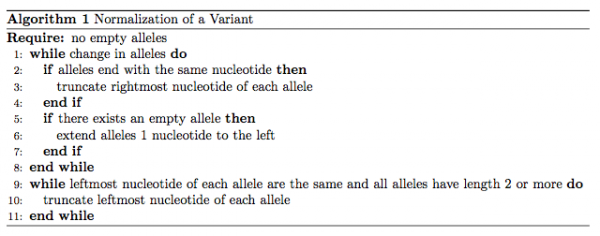

In [28]:
from opentargets_pharmgkb.variant_coordinates import Fasta

In [29]:
fasta = Fasta(fasta_path)

In [36]:
def normalise(chr, pos, ref, alts, fasta):
    alleles = [ref] + [a for a in alts]
    # while no empty alleles and all end in same nucleotide
    while all(len(a) > 0 for a in alleles) and (len(set(a[-1] for a in alleles)) == 1):
        # truncate rightmost nucleotide
        alleles = [a[:-1] for a in alleles]
        # if exists an empty allele
        if any(len(a) == 0 for a in alleles):
            # extend alleles 1 to the left
            alleles = [fasta.add_context_base(chr, pos, a) for a in alleles]
            pos -= 1
    # while all start with same nucleotide and have length 2 or more
    while (len(set(a[0] for a in alleles)) == 1) and all(len(a) >= 2 for a in alleles):
        # truncate leftmost nucleotide
        alleles = [a[1:] for a in alleles]
        pos += 1
    return chr, pos, alleles[0], alleles[1:]

In [38]:
normalise('NC_000006.12', 43768678, 'GGTCCCACTCTTCCCACAGG', ['GG', 'GGTCCCACTCTTCCCACAGGTCCCACTCTTCCCACAGG'], fasta)

('NC_000006.12',
 43768677,
 'TGGTCCCACTCTTCCCACA',
 ['T', 'TGGTCCCACTCTTCCCACAGGTCCCACTCTTCCCACA'])

In [45]:
def normalise_spdis(spdis, fasta):
    chr = pos = ref = None
    alts = []
    for spdi in spdis:
        chr, pos, ref, alt = spdi.split(':')
        alts.append(alt)
    chr, pos, ref, alts = normalise(chr, int(pos), ref, alts, fasta)
    return fasta.get_chrom_num_from_refseq(chr), pos, ref, alts

In [61]:
for rs, spdis in rsid_to_spdis.items():
    print(rs)
    chr, pos, ref, alts = normalise_spdis(spdis, fasta)
    print(f'{chr}:{pos}\n{ref}\t{alts}')
    print()

rs746071566
13:48037781
AGGAGTC	['A', 'AGGAGTCGGAGTC', 'AGGAGTCGGAGTCGGAGTC']

rs61767072
4:3767567
AGGGGGCGGGGCC	['A']

rs1048943
15:74720643
T	['A', 'C', 'G']

rs35068180
11:102845215
GA	['G', 'GAA', 'GAAA']

rs61824877
1:200273503
G	['A', 'T']

rs71486745
10:94936016
CTG	['C', 'CTGTG']

rs144854329
6:43768677
TGGTCCCACTCTTCCCACA	['T', 'TGGTCCCACTCTTCCCACAGGTCCCACTCTTCCCACA']

rs17885382
6:32584317
C	['A', 'T']

rs700518
15:51236914
T	['C']

rs28364032
17:45834975
G	['A', 'T']

rs57064725
15:78540693
C	['A']

rs72549309
1:97740409
GATGA	['G']

rs2228171
2:169196994
C	['A', 'G', 'T']

rs111618861
8:56131822
CAAA	['C', 'CA', 'CAA', 'CAAAA', 'CAAAAA', 'CAAAAAA']

rs201279313
4:127735884
TTTA	['T']

rs10170310
2:138521351
G	['A', 'C']



In [59]:
clinical_alleles_table.merge(clinical_annot_table[clinical_annot_table['Variant/Haplotypes'].isin(rs_ref_not_in_alleles)], on='Clinical Annotation ID')[['Variant/Haplotypes', 'Genotype/Allele']]

,Variant/Haplotypes,Genotype/Allele
0,rs746071566,GGAGTC/GGAGTC
1,rs746071566,GGAGTC/del
2,rs746071566,del/del
3,rs61767072,GGGGCGGGGCCG/GGGGCGGGGCCG
4,rs61767072,GGGGCGGGGCCG/del
5,rs61767072,del/del
6,rs1048943,AA
7,rs1048943,AG
8,rs1048943,GG
9,rs35068180,A/del
